<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/DailyDelhiClimateTrain.csv')
data.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [8]:
np.round(data.describe(),2)

,meantemp,humidity,wind_speed,meanpressure
count,1462.00,1462.00,1462.00,1462.00
mean,25.50,60.77,6.80,1011.10
std,7.35,16.77,4.56,180.23
min,6.00,13.43,0.00,-3.04
25%,18.86,50.38,3.48,1001.58
50%,27.71,62.62,6.22,1008.56
75%,31.31,72.22,9.24,1014.94
max,38.71,100.00,42.22,7679.33


In [13]:
px.line(data, x='date', y=['humidity','meantemp','wind_speed'],
        title='Humidity in Delhi Over the Years')

In [16]:
px.scatter(data, x='humidity', y='meantemp',
           size='meantemp',trendline='ols',
           title='Relationship Between Temperature and Humidity')

In [17]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data.head(5)

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


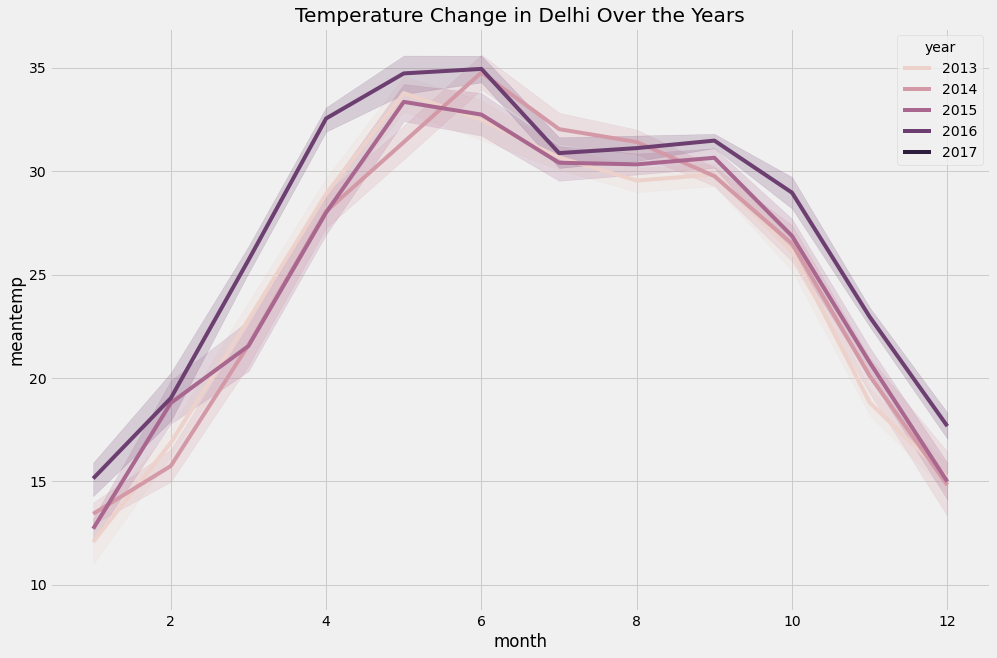

In [20]:
plt.figure(figsize=(15,10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data=data,x='month',y='meantemp',hue='year')
plt.show()

In [21]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
forecast_data = data.rename(columns = {"date": "ds",
                                       "meantemp":"y"})
print(forecast_data)

             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


In [23]:
from prophet import Prophet 
from prophet.plot import plot_plotly, plot_components_plotly 

In [24]:
model = Prophet()
model.fit(forecast_data) 
forecasts = model.make_future_dataframe(periods=365) 
predictions = model.predict(forecasts) 
plot_plotly(model,predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vplzh3g/0r149rkz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vplzh3g/cti3r23c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9780', 'data', 'file=/tmp/tmp1vplzh3g/0r149rkz.json', 'init=/tmp/tmp1vplzh3g/cti3r23c.json', 'output', 'file=/tmp/tmp1vplzh3g/prophet_modelkxilwsyx/prophet_model-20230105202625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:26:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:26:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
